# CH3133 - Computational Practicum - Q1 - Lecture coding 7

Import packages.

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

## The shooting method

We model an arbritary system on the domain $x\in [0,1]$.


$\frac{d^2y}{dx^2}=4(y-x)$


$\frac{dC_A}{dt}=-kC_A$

$\frac{dC_B}{dt}=kC_A$

At the beginning of the reaction, only $A$ present (initial condition).

$C_A(t=0\,s)=1\, mol/L$

$C_B(t=0\,s)=0\, mol/L$

### Manual guesses

Define canonical ODE system.

In [54]:
def dy(t, y):
    y1, y2 = y
    dy1 = y2
    dy2 = 4*(y1-t)
    return dy1, dy2

Define initial conditions.

In [55]:
y0_guess1 = [0,1]
y0_guess2 = [0,0]
y0_guess3 = [0,1.55]

Solve IVP with guess.

In [56]:
results_guess1 = sp.integrate.solve_ivp(dy, (0, 1), y0_guess1)
x_guess1 = results_guess1.t
y1_guess1 = results_guess1.y[0]
results_guess2 = sp.integrate.solve_ivp(dy, (0, 1), y0_guess2)
x_guess2 = results_guess2.t
y1_guess2 = results_guess2.y[0]
results_guess3 = sp.integrate.solve_ivp(dy, (0, 1), y0_guess3)
x_guess3 = results_guess3.t
y1_guess3 = results_guess3.y[0]

Print results.

/tmp/ipykernel_4781/4280200669.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


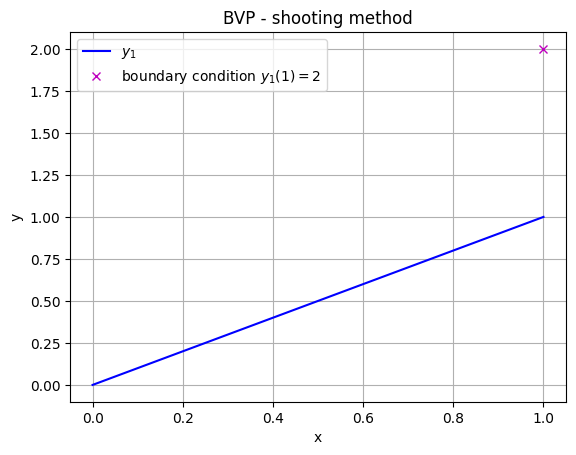

In [57]:
fig, ax = plt.subplots()
ax.plot(x_guess1, y1_guess1, label="$y_1$", color="b")
ax.plot(1, 2, label="boundary condition $y_1(1)=2$", linestyle="", marker="x", color="m")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP - shooting method")
ax.legend()
ax.grid()
fig.show()

/tmp/ipykernel_4781/1670633076.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


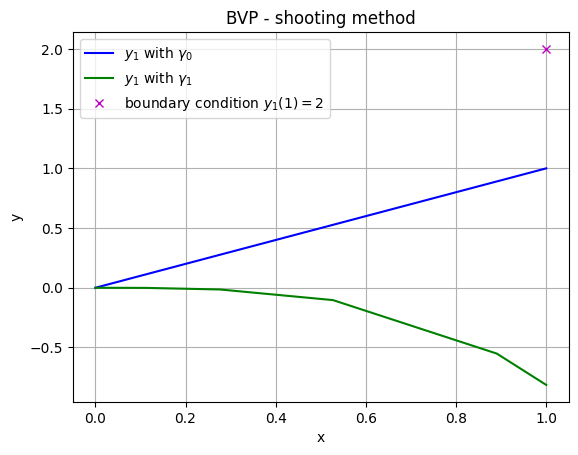

In [60]:
fig, ax = plt.subplots()
ax.plot(x_guess1, y1_guess1, label="$y_1$ with $\gamma_0$", color="b")
ax.plot(x_guess2, y1_guess2, label="$y_1$ with $\gamma_1$", color="g")
ax.plot(1, 2, label="boundary condition $y_1(1)=2$", linestyle="", marker="x", color="m")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP - shooting method")
ax.legend()
ax.grid()
fig.show()

/tmp/ipykernel_4781/2383641411.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


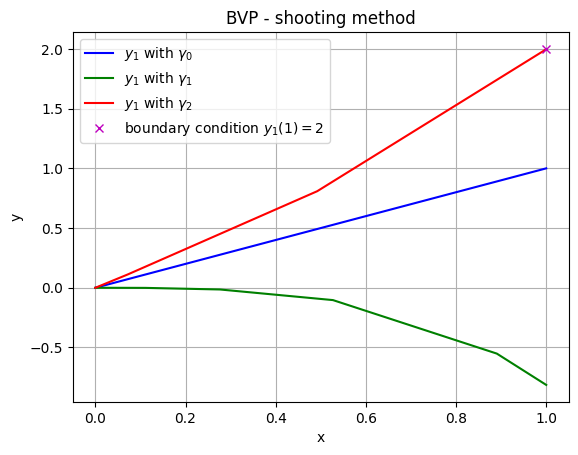

In [61]:
fig, ax = plt.subplots()
ax.plot(x_guess1, y1_guess1, label="$y_1$ with $\gamma_0$", color="b")
ax.plot(x_guess2, y1_guess2, label="$y_1$ with $\gamma_1$", color="g")
ax.plot(x_guess3, y1_guess3, label="$y_1$ with $\gamma_2$", color="r")
ax.plot(1, 2, label="boundary condition $y_1(1)=2$", linestyle="", marker="x", color="m")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP - shooting method")
ax.legend()
ax.grid()
fig.show()

### Algorithm for N equations

Define canonical ODE system.

In [ ]:
def dy(t, y):
    y1, y2 = y
    dy1 = y2
    dy2 = 4*(y1-t)
    return dy1, dy2

Define initial conditions.

## SciPy's `solve_bvp`